In [1]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
data = pd.read_csv('international-airline-passengers.csv',usecols = [1])

In [3]:
data

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [4]:
value = data.values.astype('float32')
value.shape

(144, 1)

In [5]:
train_size = int(value.shape[0] *0.67)
test_size = value.shape[0] - train_size
train = value[0:train_size]
test = value[train_size:]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [7]:
def makedata(data,ksize):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - ksize):
        x = data[i:i + ksize,0]
        y = data[i+ksize,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 12
trainx,trainy = makedata(train,look_back)
testx,testy = makedata(test,look_back)

In [9]:
trainx = np.reshape(trainx, (trainx.shape[0], trainx.shape[1],1))
testx = np.reshape(testx, (testx.shape[0], testx.shape[1],1))

In [10]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(SimpleRNN(22, input_shape=(look_back,1)))
model.add(Dense(units = 1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.fit(trainx,trainy,epochs = 125, batch_size = 10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch 1/125
84/84 [==============================] - 2s 22ms/step - loss: 0.0742
Epoch 2/125
84/84 [==============================] - 0s 617us/step - loss: 0.0356
Epoch 3/125
84/84 [==============================] - 0s 582us/step - loss: 0.0252
Epoch 4/125
84/84 [==============================] - 0s 665us/step - loss: 0.0182
Epoch 5/125
84/84 [==============================] - 0s 606us/step - loss: 0.0143
Epoch 6/125
84/84 [==============================] - 0s 570us/step - loss: 0.0132
Epoch 7/125
84/84 [==============================] - 0s 594us/step - loss: 0.0112
Epoch 8/125
84/84 [==============================] - 0s 570us/step - loss: 0.0120
Epoch 9/125
84/84 [==============================] - 0s 582us/step - loss: 0.0108
Epoch 10/125
84/84 [==============================] - 0s 558us/step - loss: 0.0093
Epoch 11/125
84/84 [==============================] - 0s 593us/step - loss: 0.0093
Epoch 12/125
84/

84/84 [==============================] - 0s 653us/step - loss: 0.0016
Epoch 96/125
84/84 [==============================] - 0s 724us/step - loss: 0.0016
Epoch 97/125
84/84 [==============================] - 0s 653us/step - loss: 0.0017
Epoch 98/125
84/84 [==============================] - 0s 665us/step - loss: 0.0020
Epoch 99/125
84/84 [==============================] - 0s 641us/step - loss: 0.0022
Epoch 100/125
84/84 [==============================] - 0s 653us/step - loss: 0.0024
Epoch 101/125
84/84 [==============================] - 0s 689us/step - loss: 0.0019
Epoch 102/125
84/84 [==============================] - 0s 665us/step - loss: 0.0018
Epoch 103/125
84/84 [==============================] - 0s 700us/step - loss: 0.0018
Epoch 104/125
84/84 [==============================] - 0s 700us/step - loss: 0.0017
Epoch 105/125
84/84 [==============================] - 0s 653us/step - loss: 0.0017
Epoch 106/125
84/84 [==============================] - 0s 629us/step - loss: 0.0015
Epoch 107/

In [12]:
test_predict = model.predict(testx)
test_predict = scaler.inverse_transform(test_predict).ravel()
test_predict.shape

(36,)

In [13]:
train_predict = model.predict(trainx)
train_predict = scaler.inverse_transform(train_predict).ravel()
train_predict.shape,test_predict.shape

((84,), (36,))

In [14]:
testTrue = scaler.inverse_transform([testy]).ravel()
trainTrue = scaler.inverse_transform([trainy]).ravel()

In [15]:
from matplotlib import pyplot as plt

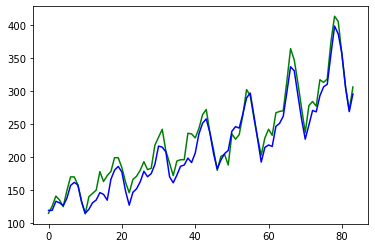

In [16]:
plt.plot(trainTrue, c = 'g')
plt.plot(train_predict, c = 'b')
plt.show()

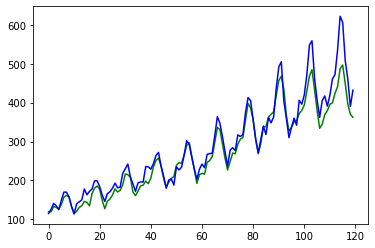

In [17]:
mixpred = np.concatenate((train_predict,test_predict))
mixtrue = np.concatenate((trainTrue,testTrue))
plt.plot(mixpred, c = 'g')
plt.plot(mixtrue, c = 'b')
plt.show()